# Data Description

Exame Nacional do Ensino Medio (ENEM) stands for National High School Exam in english. It is a non-mandatory, standarized Brazilian national exam, which evaluates high school students in Brazil. The ENEM is the most important exam in this kind in Brazil, whith more than 8.6 million registered candidates in 2016. It is the second largest in the world after the National Higher Education Entrance Examination, the entrance examination of higher education in China (taken from Wikipedia).

Every year the governement releases what they call as `microdata` which can be describe as the most granular (and anonymized) data about each student who took the exam.

In [1]:
import dask.dataframe as dd
import gc
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import seaborn as sns

In [2]:
microdata = "data/DADOS/MICRODADOS_ENEM_2017.csv"
data_dict  = "data/DICIONÁRIO/Dicionário_Microdados_Enem_2017.xlsx"

In [3]:
df = dd.read_csv(microdata, sep=';',encoding='latin-1', assume_missing=True)

In [4]:
df.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,1.700033e+11,2017.0,3503208.0,Araraquara,35.0,SP,29.0,F,0.0,1.0,...,A,C,B,B,C,B,B,B,A,A
1,1.700033e+11,2017.0,5002902.0,Cassilândia,50.0,MS,22.0,F,0.0,1.0,...,A,B,A,A,C,B,A,A,A,A
2,1.700017e+11,2017.0,3550308.0,São Paulo,35.0,SP,38.0,F,0.0,1.0,...,A,B,A,A,C,A,B,B,A,A
3,1.700017e+11,2017.0,4209300.0,Lages,42.0,SC,35.0,F,0.0,1.0,...,B,C,A,B,D,A,B,B,A,A
4,1.700017e+11,2017.0,2704302.0,Maceió,27.0,AL,40.0,M,0.0,3.0,...,A,B,B,A,C,A,C,B,A,A
5,1.700017e+11,2017.0,4303103.0,Cachoeirinha,43.0,RS,20.0,F,0.0,1.0,...,B,D,B,A,D,A,C,B,A,A
6,1.700033e+11,2017.0,4106902.0,Curitiba,41.0,PR,36.0,M,1.0,2.0,...,B,B,A,A,C,A,B,B,A,A
7,1.700033e+11,2017.0,4214805.0,Rio do Sul,42.0,SC,18.0,F,0.0,1.0,...,B,B,A,B,D,B,B,B,A,A
8,1.700033e+11,2017.0,4322509.0,Vacaria,43.0,RS,23.0,F,0.0,1.0,...,A,B,A,A,B,A,A,A,A,A
9,1.700017e+11,2017.0,2607901.0,Jaboatão dos Guararapes,26.0,PE,23.0,M,0.0,3.0,...,A,B,B,A,D,B,B,B,A,A


In [5]:
%%time
len(df)

CPU times: user 4min 7s, sys: 1min 59s, total: 6min 6s
Wall time: 2min 21s


6731341

Cada 10% = ~600 mil dados

The data can be divided into nine categories:
 - Student Data
 - Student's school Data
 - Special Treatment Data
 - Specific Treatment Data
 - Special and Specific Requests for the Test Data
 - Place where the Test were taken Data
 - Test Data
 - Essay Data
 - Social Economic Data
 
 Those informations are datailed by the following tables*:
 
 *
_I needed to use an image since `pandas` has some serious issues to treat Multi-Index Excel Files. You can check the original photo inside `img` folder._

## Student Information Data


![student](img/student_info.png)

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 3s, sys: 2min 33s, total: 6min 37s
Wall time: 2min 29s


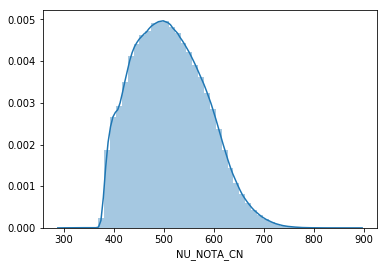

In [6]:
%%time
sns.distplot(df[('NU_NOTA_CN')].fillna(0)[df[('NU_NOTA_CN')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min, sys: 2min 53s, total: 6min 54s
Wall time: 2min 34s


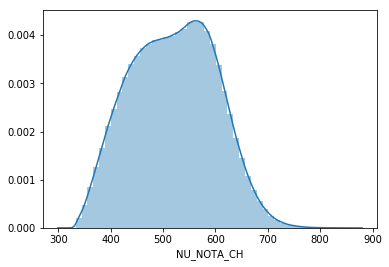

In [7]:
%%time
sns.distplot(df[('NU_NOTA_CH')].fillna(0)[df[('NU_NOTA_CH')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 6s, sys: 2min 43s, total: 6min 50s
Wall time: 2min 32s


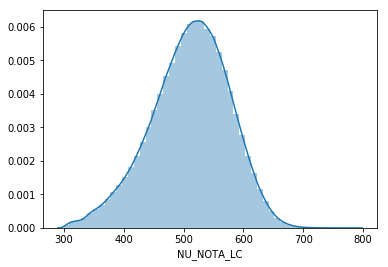

In [8]:
%%time
sns.distplot(df[('NU_NOTA_LC')].fillna(0)[df[('NU_NOTA_LC')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 40s, sys: 2min 43s, total: 7min 24s
Wall time: 3min 14s


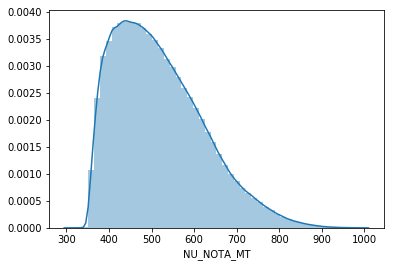

In [9]:
%%time
sns.distplot(df[('NU_NOTA_MT')].fillna(0)[df[('NU_NOTA_MT')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 5s, sys: 2min 49s, total: 6min 54s
Wall time: 2min 34s


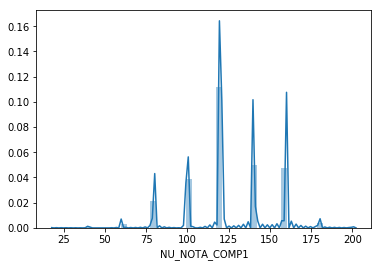

In [10]:
%%time
sns.distplot(df[('NU_NOTA_COMP1')].fillna(0)[df[('NU_NOTA_COMP1')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 4s, sys: 2min 52s, total: 6min 56s
Wall time: 2min 34s


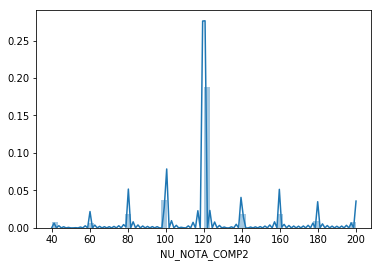

In [11]:
%%time
sns.distplot(df[('NU_NOTA_COMP2')].fillna(0)[df[('NU_NOTA_COMP2')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 3s, sys: 3min 9s, total: 7min 13s
Wall time: 2min 38s


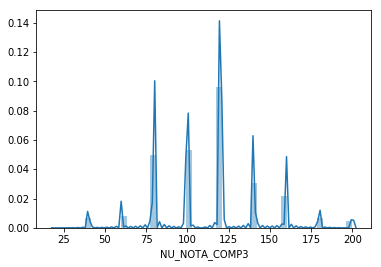

In [12]:
%%time
sns.distplot(df[('NU_NOTA_COMP3')].fillna(0)[df[('NU_NOTA_COMP3')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 6s, sys: 2min 33s, total: 6min 40s
Wall time: 2min 27s


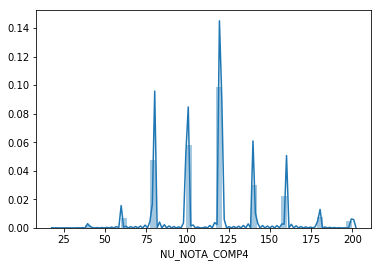

In [13]:
%%time
sns.distplot(df[('NU_NOTA_COMP4')].fillna(0)[df[('NU_NOTA_COMP4')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 4s, sys: 3min, total: 7min 4s
Wall time: 2min 33s


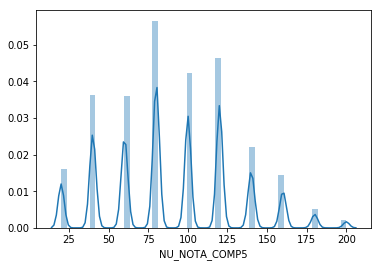

In [14]:
%%time
sns.distplot(df[('NU_NOTA_COMP5')].fillna(0)[df[('NU_NOTA_COMP5')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 1s, sys: 3min 10s, total: 7min 11s
Wall time: 2min 37s


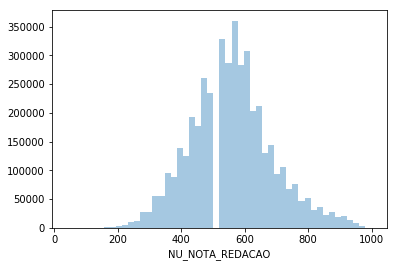

In [15]:
%%time
sns.distplot(df[('NU_NOTA_REDACAO')].fillna(0)[df[('NU_NOTA_REDACAO')].fillna(0)>0], kde=False);

In [16]:
sample = df.sample(frac=0.1)

In [17]:
%%time
pandas_df = sample.compute()

CPU times: user 4min 15s, sys: 3min 9s, total: 7min 25s
Wall time: 2min 42s


/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


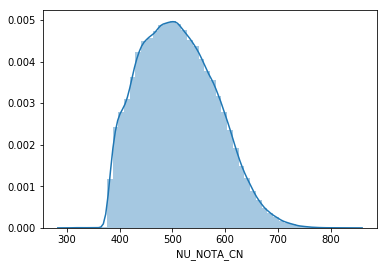

In [18]:
sns.distplot(pandas_df[('NU_NOTA_CN')].fillna(0)[pandas_df[('NU_NOTA_CN')].fillna(0)>0]);

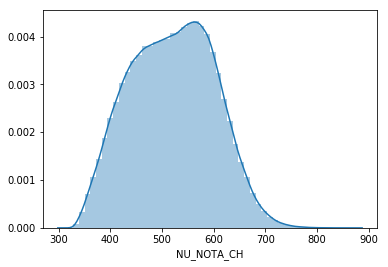

In [19]:
sns.distplot(pandas_df[('NU_NOTA_CH')].fillna(0)[pandas_df[('NU_NOTA_CH')].fillna(0)>0]);

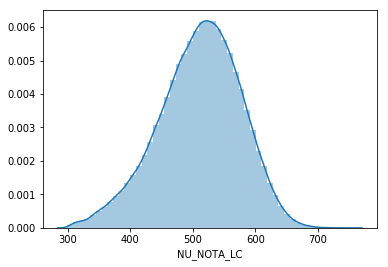

In [20]:
sns.distplot(pandas_df[('NU_NOTA_LC')].fillna(0)[pandas_df[('NU_NOTA_LC')].fillna(0)>0]);

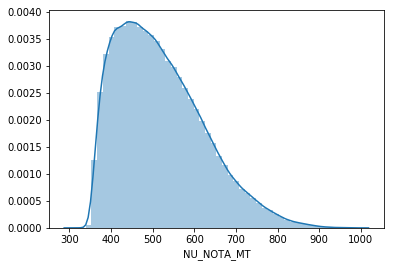

In [21]:
sns.distplot(pandas_df[('NU_NOTA_MT')].fillna(0)[pandas_df[('NU_NOTA_MT')].fillna(0)>0]);

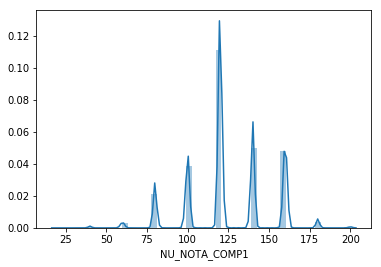

In [22]:
sns.distplot(pandas_df[('NU_NOTA_COMP1')].fillna(0)[pandas_df[('NU_NOTA_COMP1')].fillna(0)>0]);

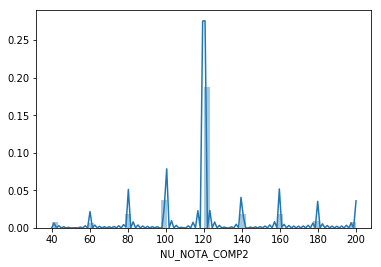

In [23]:
sns.distplot(pandas_df[('NU_NOTA_COMP2')].fillna(0)[pandas_df[('NU_NOTA_COMP2')].fillna(0)>0]);

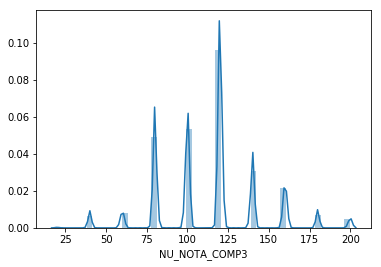

In [24]:
sns.distplot(pandas_df[('NU_NOTA_COMP3')].fillna(0)[pandas_df[('NU_NOTA_COMP3')].fillna(0)>0]);

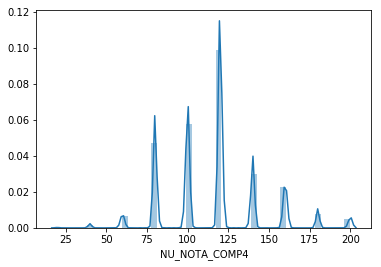

In [25]:
sns.distplot(pandas_df[('NU_NOTA_COMP4')].fillna(0)[pandas_df[('NU_NOTA_COMP4')].fillna(0)>0]);

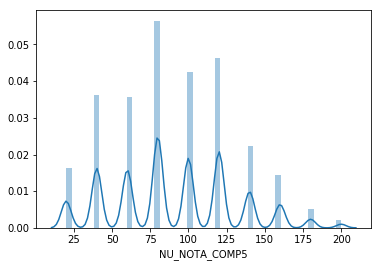

In [26]:
sns.distplot(pandas_df[('NU_NOTA_COMP5')].fillna(0)[pandas_df[('NU_NOTA_COMP5')].fillna(0)>0]);

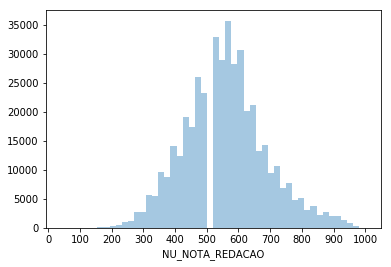

In [27]:
import matplotlib.ticker as ticker
x = np.random.randint(0,1000, size=(100))
ax = sns.distplot(pandas_df[('NU_NOTA_REDACAO')].fillna(0)[pandas_df[('NU_NOTA_REDACAO')].fillna(0)>0], kde=False);
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

In [28]:
pd.set_option('display.max_columns',None)

In [29]:
pandas_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
48095,1.700000e+11,2017.0,2408003.0,Mossoró,24.0,RN,17.0,M,0.0,1.0,1.0,2408003.0,Mossoró,24.0,RN,2.0,0.0,2.0,1.0,0.0,24002402.0,2408003.0,Mossoró,24.0,RN,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2408003.0,Mossoró,24.0,RN,1.0,1.0,1.0,1.0,394.0,396.0,400.0,405.0,631.8,609.3,591.6,696.5,BEBDEDCCCAACAACEBDDBEBEBADEDBECEEBACAABACCCBB,DCEBEACBCCDBABBAECACCBDCCCEEBEEBDECDCAEEBDBEC,99999BCBDECCEBDEEDCEDADDDABBADEDEDAAAABBBACAEB...,ABCDBABEEBBCDABCEBBDBDEABEECBECABEDAEBDABBBCB,1.0,EEAAECDCCDADAADECDCBCDAAEDEEBABCEDDCBEBAABCBB,CDEAEECAEBDBDBBAECDAEBCCCDAEBEABDBEDAADBCDDEC,EDDCDBEEDECCEBDAEDAEDAABEDBBADEDEDDABAABBDCBEA...,BBDBADBEECDCCECAEBBDDEDDCCBBACADAEACEADABDECB,1.0,160.0,120.0,160.0,160.0,80.0,680.0,F,E,B,F,5.0,C,A,B,D,A,B,B,C,A,A,A,A,A,C,A,A,C,A,B,B,B,A
79687,1.700050e+11,2017.0,3137205.0,Lagoa da Prata,31.0,MG,16.0,F,0.0,1.0,1.0,3137205.0,Lagoa da Prata,31.0,MG,3.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3137205.0,Lagoa da Prata,31.0,MG,1.0,1.0,1.0,1.0,392.0,398.0,401.0,404.0,585.4,603.8,560.9,670.5,BCAEACADAAECACACDEBADAADBDAAACEEBEAECCCEDBAAC,CACBDDAABBDAEDACCADEDCCEAEDCEEDEBBBEBBAACBDAD,DCEBC99999BBABAACEDBBDEDCAEABBCDCDBBAEDADBBABB...,CEECABBDDBABDCDCEBCBDCABECBABEBCDEBABAEABBACD,0.0,BCBBEBAAEDDCBDADEEBADECDCBCDAAEABCEEAAECDCCDA,DAEBEABDBEDACDDECADBCCCAECDEECAEBDBDBBAECDAEB,DEDCDBEEDEECABAAEDDCBDEDBAEABBBDEDBBCCDAEBCAAB...,CCECEECDADBBDBBDBAEBDDABECBDCCDEDBBACAEADAEAC,1.0,200.0,120.0,180.0,200.0,120.0,820.0,E,G,C,D,4.0,H,A,D,D,B,C,B,B,B,A,B,A,A,C,A,A,D,A,B,B,C,A
47855,1.700000e+11,2017.0,2105302.0,Imperatriz,21.0,MA,16.0,F,0.0,1.0,1.0,2105302.0,Imperatriz,21.0,MA,3.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [30]:
number_na = dict()
for i in tqdm_notebook(pandas_df.columns):
    num_nan_i = pandas_df.loc[ (pd.isna(pandas_df[i])), i ].shape[0]
    number_na[i]= num_nan_i

In [31]:
len(pandas_df)

673134

In [32]:
sorted(number_na.items(), key=operator.itemgetter(1), reverse=True)

[('TP_SIT_FUNC_ESC', 495532),
 ('TP_ENSINO', 494932),
 ('CO_ESCOLA', 494931),
 ('CO_MUNICIPIO_ESC', 494931),
 ('NO_MUNICIPIO_ESC', 494931),
 ('CO_UF_ESC', 494931),
 ('SG_UF_ESC', 494931),
 ('TP_DEPENDENCIA_ADM_ESC', 494931),
 ('TP_LOCALIZACAO_ESC', 494931),
 ('CO_PROVA_CN', 229562),
 ('CO_PROVA_MT', 229562),
 ('NU_NOTA_CN', 229562),
 ('NU_NOTA_MT', 229562),
 ('TX_RESPOSTAS_CN', 229562),
 ('TX_RESPOSTAS_MT', 229562),
 ('TX_GABARITO_CN', 229562),
 ('TX_GABARITO_MT', 229562),
 ('CO_PROVA_CH', 203328),
 ('CO_PROVA_LC', 203328),
 ('NU_NOTA_CH', 203328),
 ('NU_NOTA_LC', 203328),
 ('TX_RESPOSTAS_CH', 203328),
 ('TX_RESPOSTAS_LC', 203328),
 ('TX_GABARITO_CH', 203328),
 ('TX_GABARITO_LC', 203328),
 ('TP_STATUS_REDACAO', 203328),
 ('NU_NOTA_COMP1', 203328),
 ('NU_NOTA_COMP2', 203328),
 ('NU_NOTA_COMP3', 203328),
 ('NU_NOTA_COMP4', 203328),
 ('NU_NOTA_COMP5', 203328),
 ('NU_NOTA_REDACAO', 203328),
 ('TP_ESTADO_CIVIL', 27591),
 ('CO_MUNICIPIO_NASCIMENTO', 23022),
 ('NO_MUNICIPIO_NASCIMENTO', 23022

# Next steps

- Remove all the rows with None as Grades
- Remove Gabarito From Columns
- Remove Presenca
- NU_INSCRICAO
- NU_ANO
- E RESIDENCIAS
- Remove Notas das Competencias da Redacao
- Remover Codigo das Provas (CO)
